In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
from skimage.morphology import skeletonize, thin

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
def roi(im):
  min_area=sys.maxsize-1
  r=im.shape[0]
  c=im.shape[1]
  ans = 0
  #print(im.shape)
  for i in range(r - 75):
    for j in range(c-60):
      #print(i)
      area=im[i:i+75,j:j+60]
      fin_area=0
      for k in range(area.shape[0]):
        for l in range(area.shape[1]):
          fin_area += area[k,l]
      # print(fin_area)
      if fin_area<min_area:
        min_area=fin_area
        ans1=i
        ans2=j
        ans = area
  return ans

def pre_process(img):
  g = cv2.blur(img , (5,5),0)
  g =  cv2.GaussianBlur(img,(5,5),0)
  # g = cv2.bilateralFilter(g,9,75,75)
  g = cv2.medianBlur(g, 3)
  g = cv2.equalizeHist(g)
  # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  # g = clahe.apply(g)
  # kernel = np.ones((5,5),np.uint8)
  # th3 = threshold_niblack(g, window_size=11)
  # g = g > th3
  g=cv2.adaptiveThreshold(g,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
  return g

def binarize(x):
  for i in range(len(x)):
    for j in range(len(x[i])):
      if x[i,j]==1:
        x[i,j]=0
      else:
        x[i,j]=1
  skeleton = skeletonize(x)
  thinned = thin(x)
  thinned_partial = thin(x, max_iter=5)
  return skeleton

In [0]:
i = np.load('/content/drive/My Drive/Mini_project/pre_processed_images/p1_left_act_3.npy',allow_pickle=True)

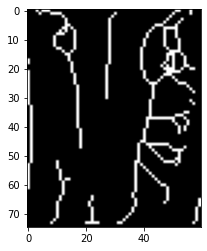

In [0]:
plt.imshow(i,cmap = 'gray')

In [0]:
import cv2
import os

def load_images_from_folder(folder):
    images = list()
    file_names = list()
    for filename in os.listdir(folder):
        # print(filename)
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
            file_names.append(filename)
    return images,file_names

In [0]:
images , file_names = load_images_from_folder('/content/drive/My Drive/Mini_project/left/ice')
for i in range(len(file_names)):
  file_names[i] = file_names[i][0:len(file_names[i])-4]

In [0]:
#images is a list
def process(images):
  res_images = []
  for image in images:
    img = image[75:225 , 60:220]
    roi_img = roi(img)
    pre_img = pre_process(roi_img)
    bin_img = binarize(pre_img)
    res_images.append(bin_img)
  return res_images

def write_np(images,file_names):
  for i,image in enumerate(images):
    np.save('/content/drive/My Drive/Mini_project/pre_processed_images/ice'+file_names[i],image)

In [0]:
# print(images[0])
result = process(images)
write_np(result, file_names)

(240, 300)

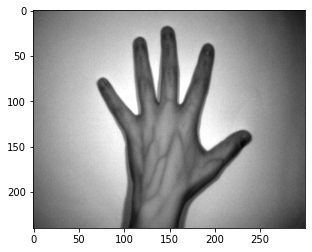

In [0]:
plt.imshow(images[0],cmap = 'gray')
images[1].shape

In [0]:
img = np.load('/content/drive/My Drive/Mini_project/pre_processed_images/p76_left_act_1.npy',allow_pickle = True)

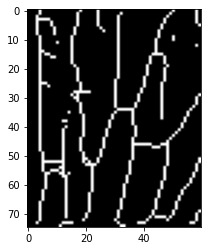

In [0]:
plt.imshow(img , cmap = 'gray')

In [0]:
img = np.load('/content/drive/My Drive/Mini_project/pre_processed_images/p76_left_act_3.npy',allow_pickle = True)

(75, 60)

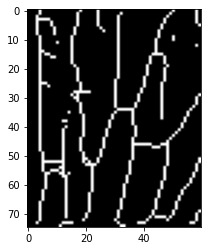

In [0]:
plt.imshow(img , cmap = 'gray')
img.shape

In [0]:
images , file_names = load_images_from_folder(folder='/content/drive/My Drive/Mini_project/pre_processed_images')

In [0]:
y = list()
for i in range(len(file_names)):
  file_names[i] = file_names[i][0:len(file_names[i])-5]
  y.append(file_names[i])

In [0]:
len(y)

300

In [0]:
X_train = list()
for i in range(len(images)):
  d = images[i].flatten()
  X_train.append(d)

In [0]:
len(X_train[0])

4500

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC,SVC

In [0]:
model = SVC(kernel = 'rbf',C = 5)

In [0]:
model.fit(X_train,y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
accuracy_score(model.predict(X_train) , y_train)

1.0

In [0]:
model.predict([X_train[0]])

array(['p10_left_act_'], dtype='<U14')

In [0]:
test_1 = cv2.imread('/content/drive/My Drive/Mini_project/images/p1_left_act_3.bmp',0)

In [0]:
test_1 = binarize(pre_process(roi(test_1[75:225 , 60:220])))

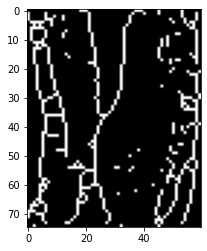

In [0]:
plt.imshow(test_1 , cmap = 'gray')

In [0]:
tes = test_1.flatten()

In [0]:
model.predict([tes])

array(['p1_left_act_'], dtype='<U14')

In [0]:
images,file_names = folder

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization,AveragePooling2D,GlobalAveragePooling2D

In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(75,60,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

In [0]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [0]:
model.fit(x,y , batch_size=32, epochs=100)

Epoch 1/100
300/300 [==============================] - 4s 15ms/step - loss: 4.6051 - accuracy: 0.0033
Epoch 2/100
300/300 [==============================] - 1s 5ms/step - loss: 4.6011 - accuracy: 0.0400
Epoch 3/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5982 - accuracy: 0.1133
Epoch 4/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5947 - accuracy: 0.2033
Epoch 5/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5916 - accuracy: 0.2433
Epoch 6/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5871 - accuracy: 0.3267
Epoch 7/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5818 - accuracy: 0.4567
Epoch 8/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5755 - accuracy: 0.4900
Epoch 9/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5680 - accuracy: 0.5267
Epoch 10/100
300/300 [==============================] - 1s 5ms/step - loss: 4.5585 - accur

In [0]:
x = np.array(images)
len(x)

300

In [0]:
dummy = []
for i in range(len(x)):
  # print(x[i].shape)
  # for j in range(len(x[i])):
  #   for k in range(len(x[i][j])):
  #     if x[i][j][k] :
  #       x[i][j][k] = 1
  #     else:
  #       x[i][j][k] = 0
  d = np.expand_dims(x[i],axis=2)
  dummy.append(d)

In [0]:
c = np.array([x[0]])

In [0]:
x = np.array(dummy)

In [0]:
x.shape

(300, 75, 60, 1)

In [0]:
def is_num(s):
  if s in ('1','2','3','4','5','6','7','8','9','0'):
    return True
  return False
categories=[]
for j in range(len(file_names)):
  category=''
  i=0
  while i<=3:
    if is_num(file_names[j][i]):
      category=category+file_names[j][i]
    i+=1
  categories.append(int(category))

In [0]:
y = list()
for i in categories:
  one_hot = np.zeros(100)
  one_hot[i-1] = 1
  y.append(one_hot)

In [0]:
categories

In [0]:
np.argmax(model.predict(np.array([x[0]])))

9

In [0]:
np.argmax(y[1])

13

In [0]:
p = cv2.imread('/content/drive/My Drive/Mini_project/left/ice/p57_left_ice_1.bmp',0)

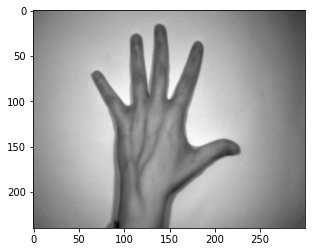

In [0]:
plt.imshow(p,cmap = 'gray')

In [0]:
def predi(img):
  a = binarize(pre_process(roi(img[75:225 , 60:220])))
  a = np.expand_dims(a,axis=2)
  return model.predict(np.array([a]))

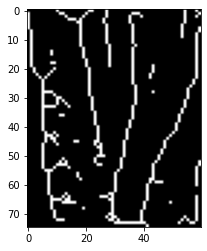

In [0]:
plt.imshow(p100, cmap = 'gray')

In [0]:
np.argmax(predi(p))

40

In [0]:
model.predict(np.array([d]))

array([[0.00324228, 0.01575863, 0.00806203, 0.00340467, 0.01307258,
        0.03791761, 0.00412477, 0.0073624 , 0.05305249, 0.00920359,
        0.02934495, 0.00238685, 0.00507403, 0.00946548, 0.00336487,
        0.01966231, 0.07320485, 0.00036704, 0.02330631, 0.00174503,
        0.01813696, 0.0043565 , 0.00556305, 0.00461161, 0.00151199,
        0.00656538, 0.00544348, 0.01105333, 0.00192613, 0.00989076,
        0.00846667, 0.0032939 , 0.01384464, 0.00176409, 0.00864135,
        0.01182915, 0.01088704, 0.00959696, 0.00403948, 0.00727771,
        0.01253046, 0.00463149, 0.00213132, 0.02735259, 0.00784393,
        0.03455443, 0.00434348, 0.00808933, 0.0052432 , 0.00091009,
        0.00997445, 0.00104679, 0.01232173, 0.00666182, 0.00617683,
        0.00562369, 0.00358739, 0.00937943, 0.00451042, 0.01760736,
        0.00091224, 0.00097355, 0.00222092, 0.00717544, 0.00864726,
        0.00032626, 0.00340098, 0.00234614, 0.01619656, 0.01024206,
        0.00129277, 0.00359476, 0.00674799, 0.00

In [6]:
from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == '__main__':
    app.run(port = 6000)

TypeError: ignored

In [4]:
!pip install flask_ngrok